### **Pembelajaran Mesin H**
### **Rakha Fathin Izzan Consetta / 502522156**
### **Tugas Hierarchical Clustering**


#### **Read Data**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')
df.head()

/kaggle/input/vehicle-sales-data/car_prices.csv


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### **Assessing Data**

Menampilkan semua kolom, jumlah non null valuenya, serta data typenya

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Melakukan operasi statistika pada nilai numerik dan non-numerik

In [3]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


Menghitung jumlah data yang null pada setiap kolom

In [4]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Menghitung data yang merupakan duplikat dari row sebelumnya

In [5]:
df.duplicated().sum()

0

**Penjelasan Mengenai Atribut Data**

Data Numerical:
1. Year: Tahun pembuatan kendaraan 
2. Condition: Representasi numerik dari kondisi kendaraan 
3. Odometer: Jarak tempuh atau jarak yang ditempuh oleh kendaraan
4. MMR: Laporan Pasar Manheim, alat penetapan harga yang digunakan dalam industri otomotif
5. Selling Price: Harga jual kendaraan

Data Categorical:
1. Make: Merek atau produsen kendaraan
2. Model: Model spesifik kendaraan 
3. Trim: Penunjukan tambahan untuk versi atau paket opsi tertentu dari model
4. Body: Jenis badan kendaraan
5. Transmission: Jenis transmisi dalam kendaraan
6. VIN: Nomor Identifikasi Kendaraan, kode unik yang digunakan untuk mengidentifikasi kendaraan bermotor individu
7. State: Negara bagian di mana kendaraan berada atau terdaftar 
8. Color: Warna eksterior kendaraan
9. Interior: Warna interior kendaraan
10. Seller: Entitas atau perusahaan yang menjual kendaraan 
11. Sale Date: Tanggal dan waktu ketika kendaraan dijual

>
**Masalah yang Terdapat pada Data:**

1. Banyak kolom, numerical maupun kategorical, yang memiliki null value.
2. Beberapa kolom atau atribut yang tidak terlalu penting atau tidak akan digunakan dalam EDA dan K-Means Clustering


### **Data Cleaning**

**Drop kolom yang tidak diperlukan**

Setelah dilakukan analisis, kolom Model, Trim, Transmission, VIN, Interior, Sale Date tidak akan terlalu diperhatikan dalam EDA dan perhitungan k-means

In [6]:
df = df.drop(['model', 'trim', 'transmission', 'vin', 'interior', 'saledate'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   body          545642 non-null  object 
 3   state         558837 non-null  object 
 4   condition     547017 non-null  float64
 5   odometer      558743 non-null  float64
 6   color         558088 non-null  object 
 7   seller        558837 non-null  object 
 8   mmr           558799 non-null  float64
 9   sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.6+ MB


**Menangani null value pada kolom numerical**

Pertama kita cek visualisasi data untuk menentukan apakah kita harus menggunakan mean atau median

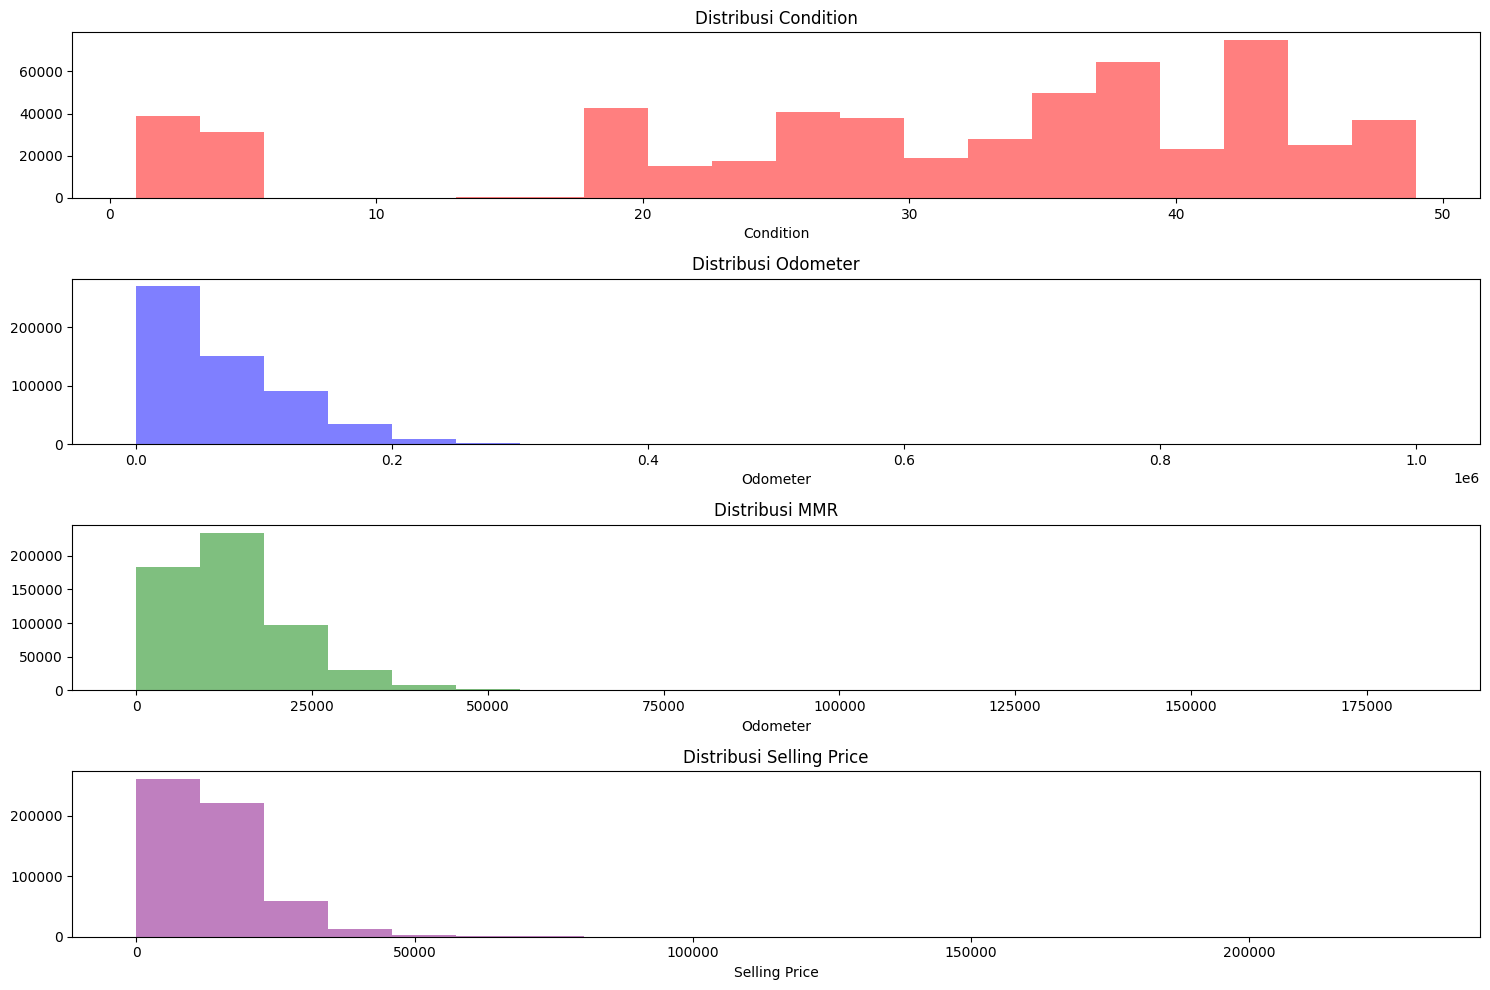

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Condition')
plt.xlabel('Condition')

plt.subplot(4, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi Odometer')
plt.xlabel('Odometer')

plt.subplot(4, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='green', alpha=0.5)
plt.title('Distribusi MMR')
plt.xlabel('Odometer')

plt.subplot(4, 1, 4)
plt.hist(df['sellingprice'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Selling Price')
plt.xlabel('Selling Price')

plt.tight_layout()
plt.show()

Karena Condition datanya lebih tersebar, maka null values diisi dengan mean. Sedangkan odometer, mmr, dan selling price diisi dengan median karena ada beberapa outlier.

In [8]:
df['condition'].fillna(df['condition'].mean(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['mmr'].fillna(df['mmr'].median(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].median(), inplace=True)

**Menangani null value pada kolom categorical**

Hal ini dapat dilakukan salah satunya dengan mengisinya dengan kategori placeholder, seperti 'Other' 

In [9]:
df['make'].fillna('Other', inplace=True)
df['body'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)


In [10]:
df.isnull().sum()

year            0
make            0
body            0
state           0
condition       0
odometer        0
color           0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [11]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,558837.000000,558837.000000,558837.000000,558837.000000
mean,2010.038927,30.672365,68317.315359,13769.274180,13611.326356
std,3.966864,13.260332,53394.458135,9679.646165,9749.399466
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,34.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99103.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**Scatter Matrix**

Untuk mengetahui korelasi antar semua kombinasi data numerik

In [12]:
numeric_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

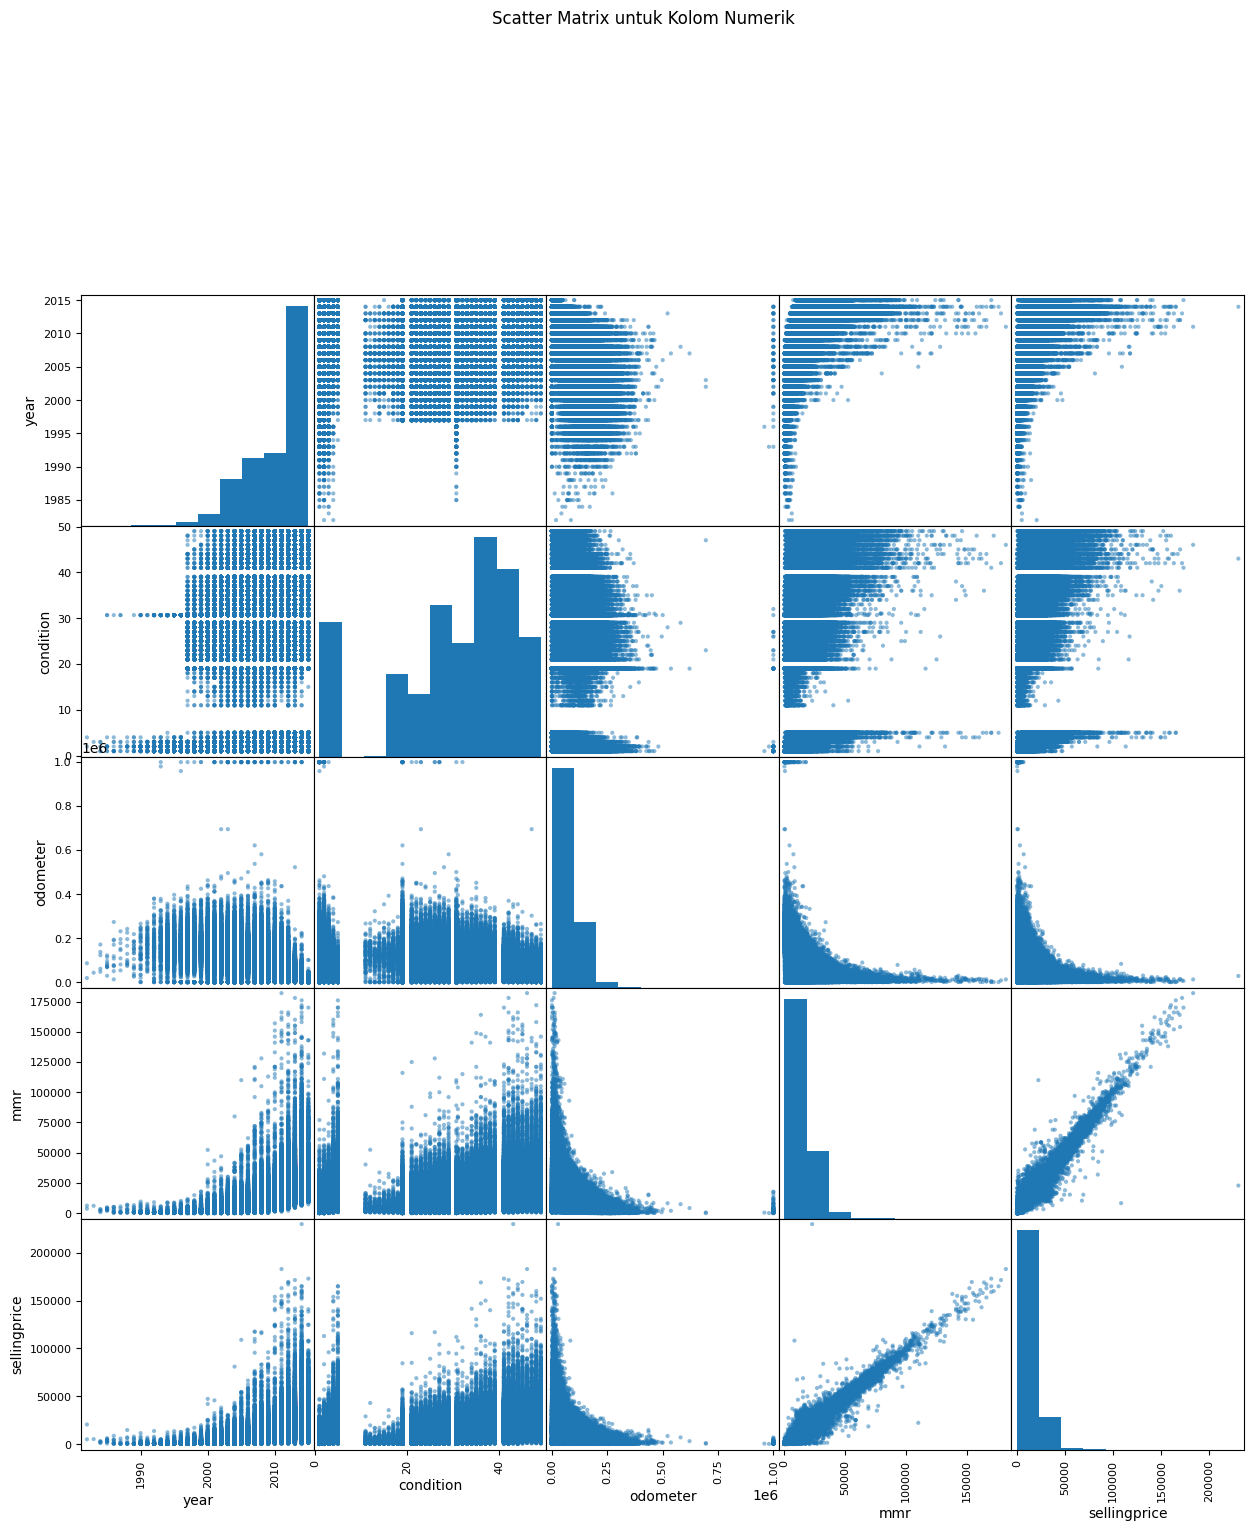

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[numeric_columns], alpha=0.5, figsize=(15, 15), diagonal='hist')
plt.suptitle('Scatter Matrix untuk Kolom Numerik', y=1.07)
plt.show()

In [14]:
df.shape

(558837, 10)

Dapat diperhatikan pada scatter matrix bawha banyak data outlier, maka akan dilakukan penanganan outlier dengan z-score

In [15]:
from scipy import stats

z_scores = stats.zscore(df[numeric_columns])
clean_df = df[(z_scores < 2).all(axis=1)]
clean_df.shape

(511831, 10)

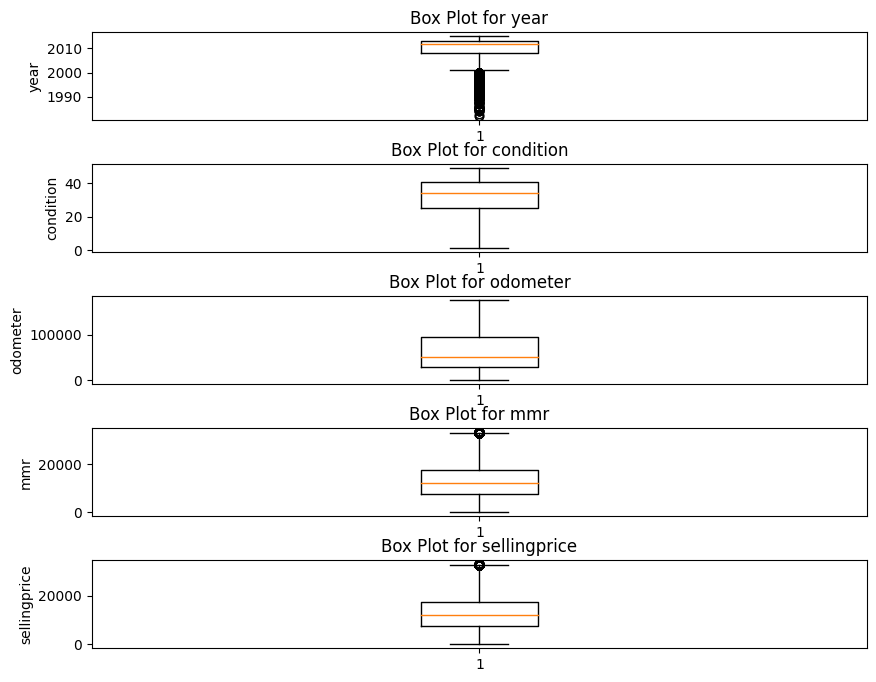

In [16]:

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [17]:
df = clean_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511831 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          511831 non-null  int64  
 1   make          511831 non-null  object 
 2   body          511831 non-null  object 
 3   state         511831 non-null  object 
 4   condition     511831 non-null  float64
 5   odometer      511831 non-null  float64
 6   color         511831 non-null  object 
 7   seller        511831 non-null  object 
 8   mmr           511831 non-null  float64
 9   sellingprice  511831 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 43.0+ MB


### **Exploratory Data Analysis**

**1. Feature Understanding**

Feature understanding adalah proses memahami variabel atau fitur (features) yang ada dalam dataset. Ini melibatkan pemahaman mendalam tentang setiap variabel, termasuk karakteristik, makna, dan pengaruhnya terhadap fenomena yang diamati.

Membandingkan tahun dibuat dengan kilometer yang telah ditempuh

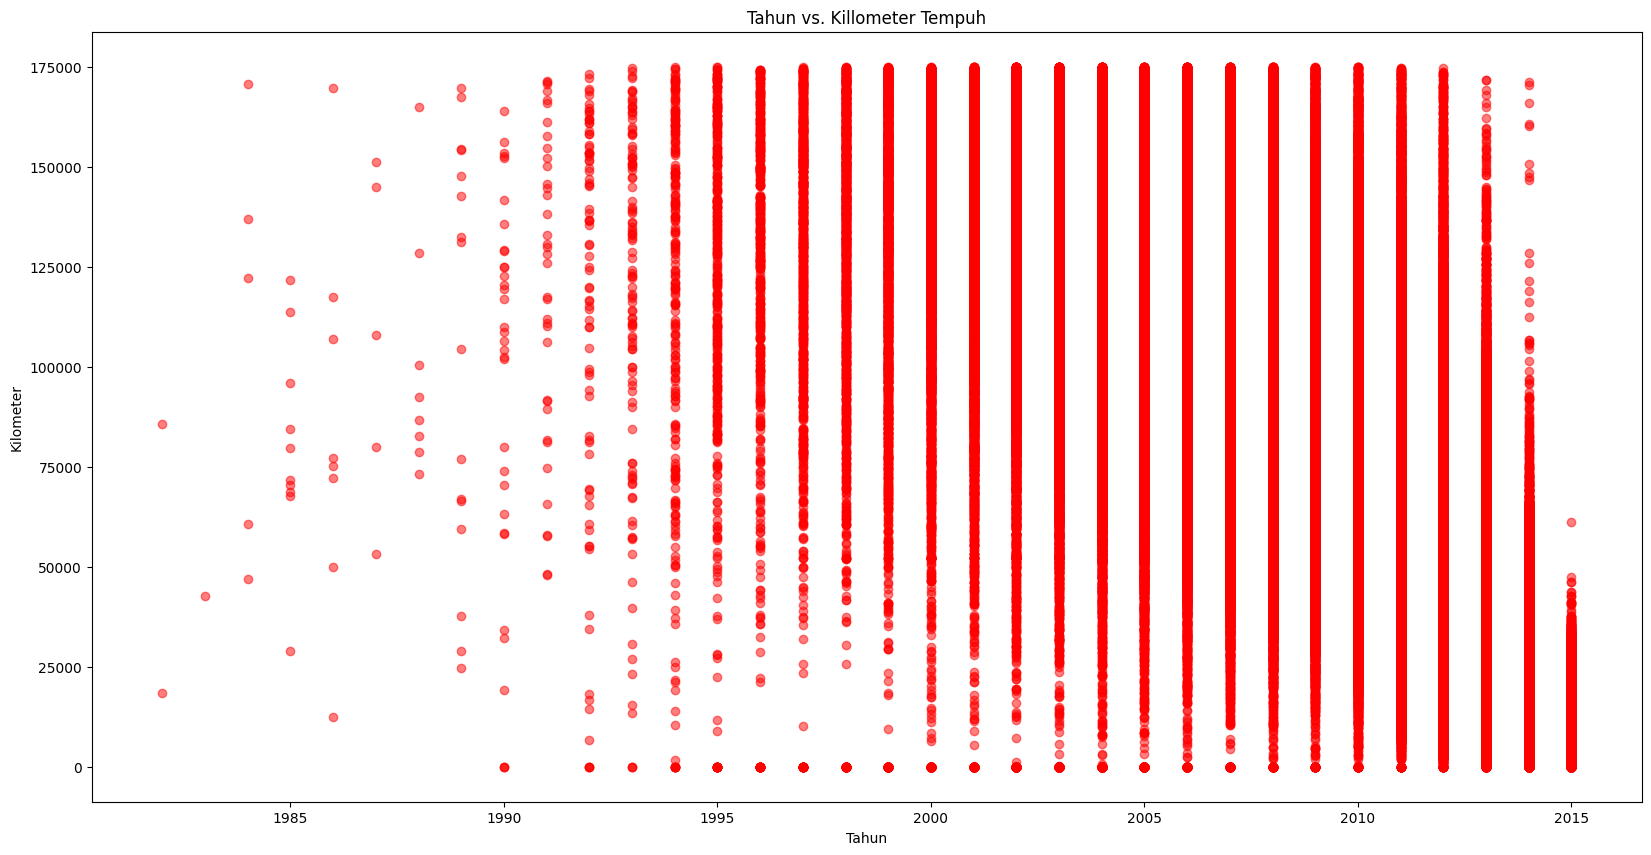

In [18]:
plt.figure(figsize=(20, 10))

plt.scatter(df['year'], df['odometer'], alpha=0.5, c='red')
plt.title('Tahun vs. Killometer Tempuh')
plt.xlabel('Tahun')
plt.ylabel('Kilometer')
plt.show()

Membandingkan MMR mobil dengan harga jual

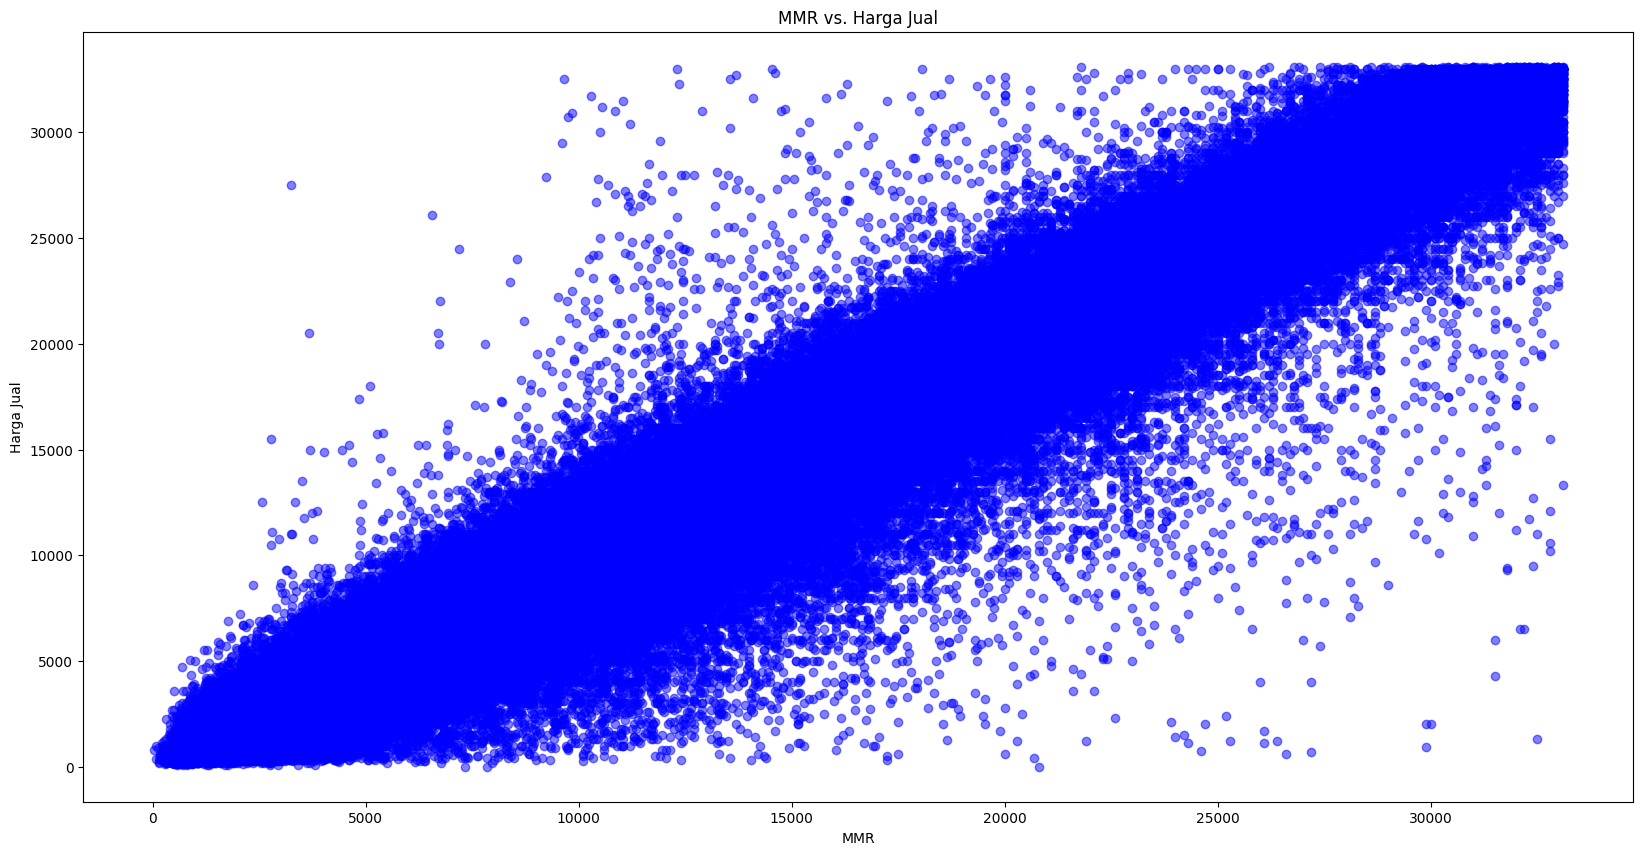

In [19]:
plt.figure(figsize=(20, 10))

plt.scatter(df['mmr'], df['sellingprice'], alpha=0.5, c='blue')
plt.title('MMR vs. Harga Jual')
plt.xlabel('MMR')
plt.ylabel('Harga Jual')
plt.show()

Distribusi mobil berdasarkan merek

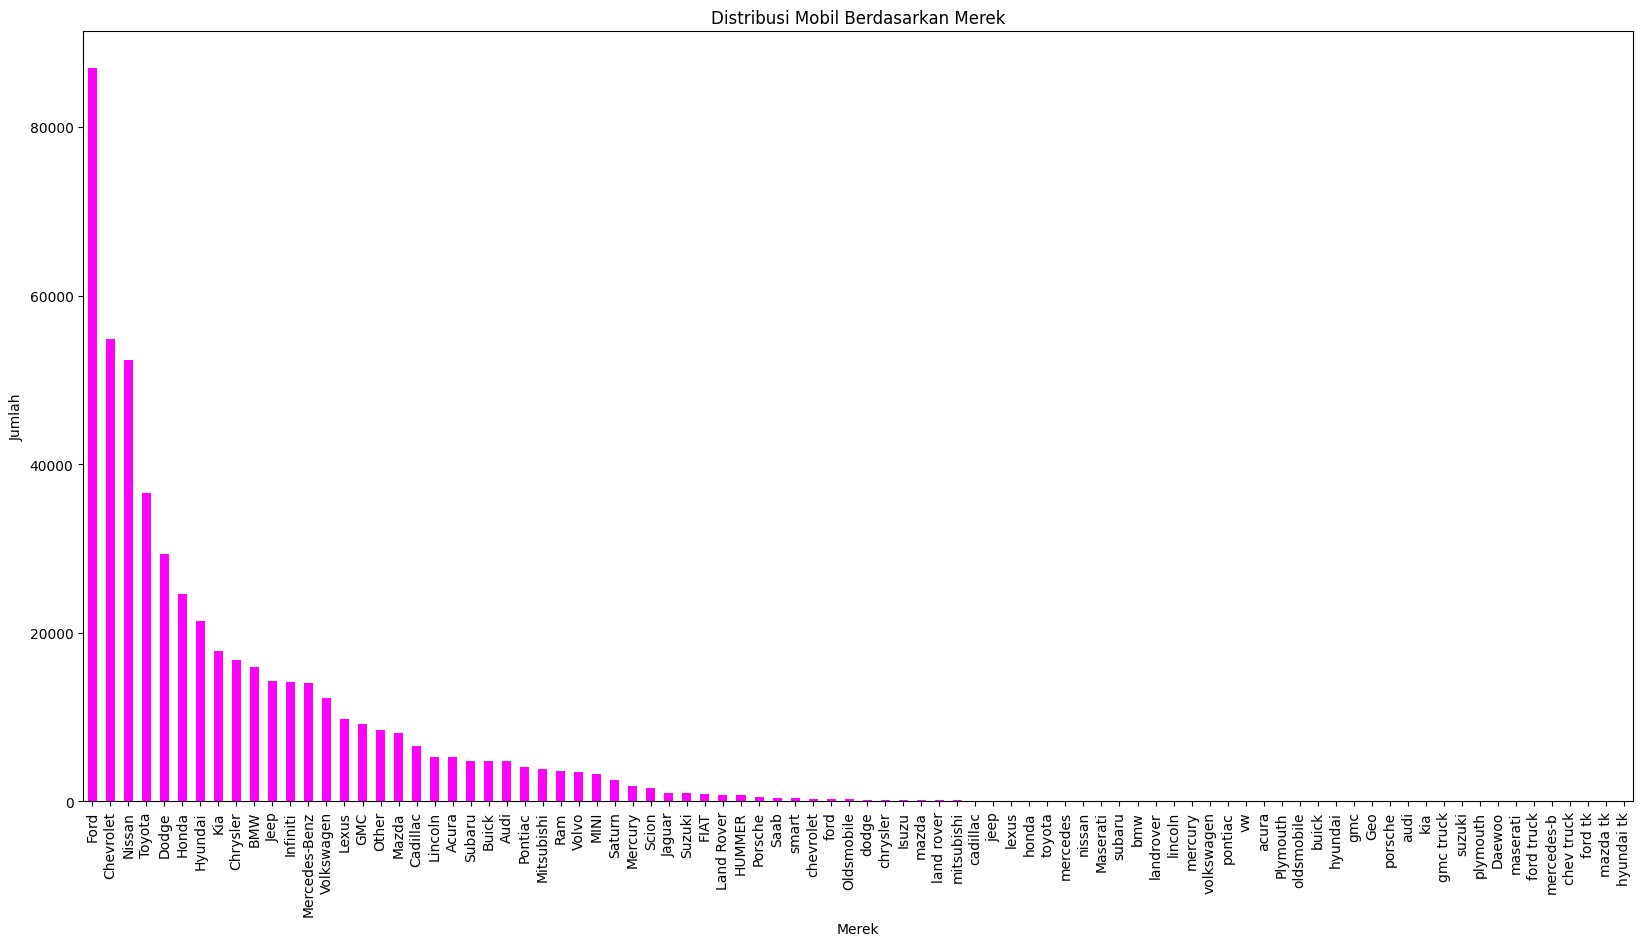

In [20]:
plt.figure(figsize=(20, 10))

df['make'].value_counts().plot(kind='bar', color='magenta')
plt.title('Distribusi Mobil Berdasarkan Merek')
plt.xlabel('Merek')
plt.ylabel('Jumlah')
plt.show()

Distribusi harga jual mobil


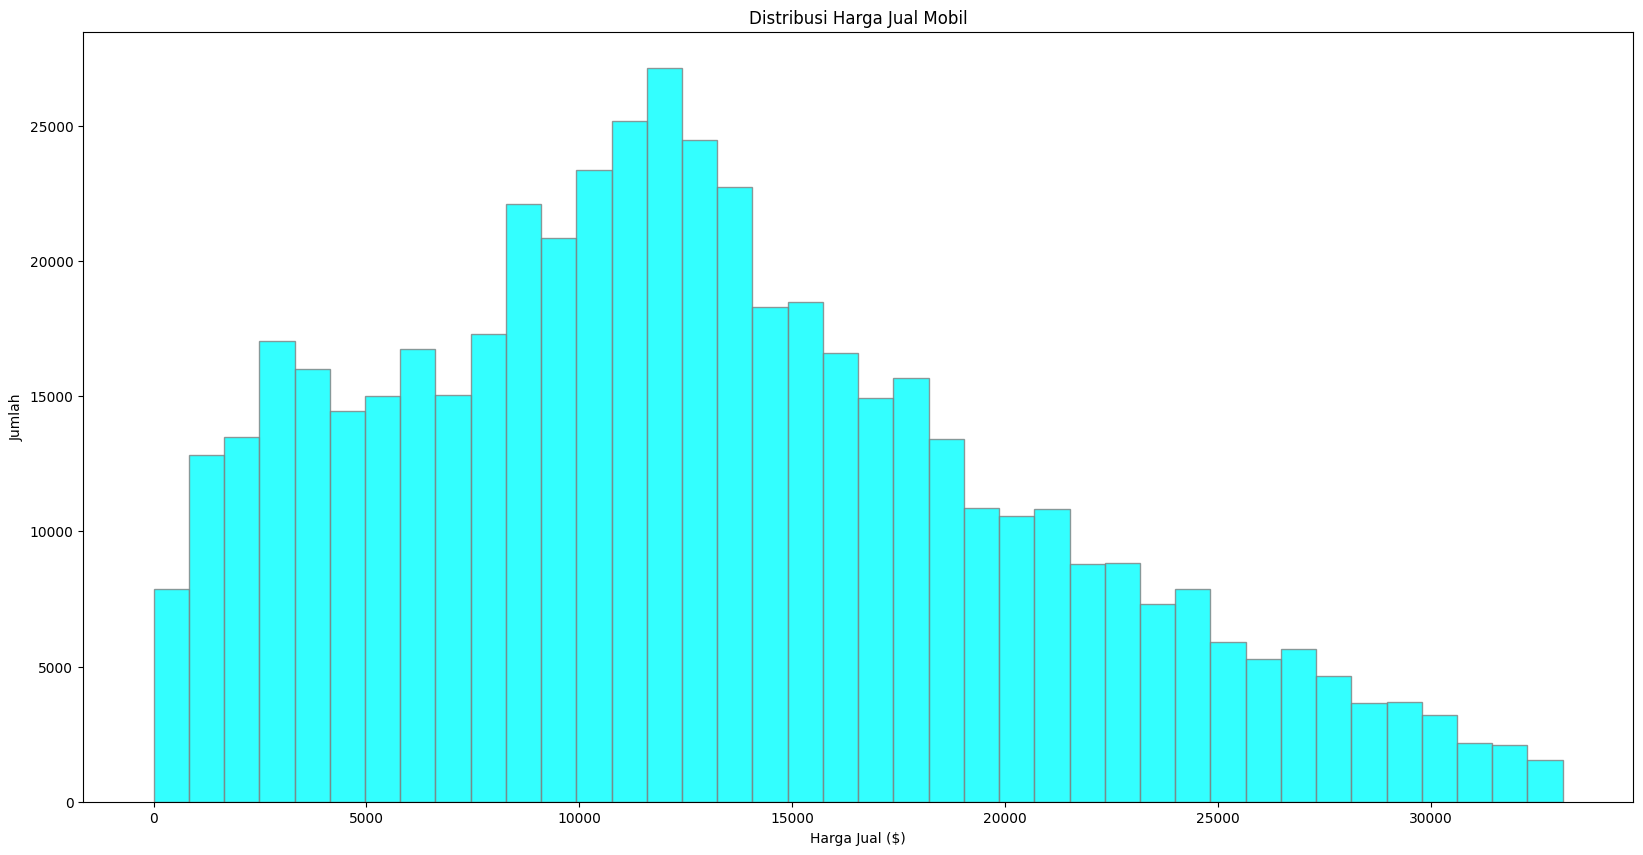

In [21]:
plt.figure(figsize=(20, 10))

plt.hist(df['sellingprice'], alpha=0.8, bins=40, color='cyan', edgecolor='grey')
plt.title('Distribusi Harga Jual Mobil')
plt.xlabel('Harga Jual ($)')
plt.ylabel('Jumlah')
plt.show()

**2. Correlation Matrix**

Matriks korelasi adalah matriks untuk mengetahui koefisien korelasi antar atribut pada data

In [22]:
corr_matrix = df[numeric_columns].dropna().corr()
corr_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.294478,-0.774684,0.652499,0.635983
condition,0.294478,1.000000,-0.275594,0.283393,0.338584
odometer,-0.774684,-0.275594,1.000000,-0.653683,-0.644113
mmr,0.652499,0.283393,-0.653683,1.000000,0.975809
sellingprice,0.635983,0.338584,-0.644113,0.975809,1.000000


<Axes: >

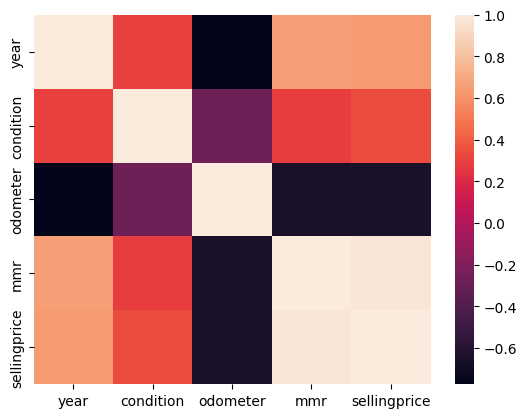

In [23]:
import seaborn as sns

sns.heatmap(corr_matrix)

Beberapa kesimpulan yang dapat diambil dari korelasi matriks diatas adalah
1. 'year' dan 'sellingprice' memiliki korelasi positif yang berarti mobil yang lebih baru memiliki harga yang lebih mahal
2. 'year' dan 'odometer' memiiki korelasi negatif, yang berarti semakin tua mobil, semakin tinggi kilometer yang ditempuh
3. 'mmr' dan 'sellingprice' memiliki korelasi positif yang kuat, yang berarti semakin tinggi MMR, semakin tinggi harga jual

#### Data Preprocessing


Diambil sample 10000 data dari 500000~ data agar mempercepat komputasi

In [27]:
from sklearn.preprocessing import StandardScaler

sampled_data = df.sample(n=10000, replace=False)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(sampled_data[numeric_columns])
scaled_df

array([[-2.48999186, -0.44503552,  1.88922563, -1.52230788, -1.43722952],
       [ 1.0214901 ,  0.61817351, -0.55795549,  0.59687438,  0.67821148],
       [-1.67964987,  1.07383452,  1.00956765, -1.01397891, -0.718522  ],
       ...,
       [ 1.0214901 , -1.96390556, -1.14744737,  0.30836334,  0.42056162],
       [ 0.75137611, -2.11579257,  0.0387333 ,  0.57626645,  0.56972733],
       [ 1.0214901 ,  0.16251249, -0.5473237 , -0.13814183, -0.12185915]])

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# Fit and transform the data
df_pca = pca.fit_transform(scaled_df)
df_pca

array([[ 3.63941745, -0.44763555,  0.84743874],
       [-1.52799495, -0.26539054, -0.21020524],
       [ 1.86694304, -1.57186955,  0.54851932],
       ...,
       [-0.90349528,  2.25350669, -0.74684906],
       [-0.39883769,  2.25927361,  0.20672081],
       [-0.6399189 , -0.00707193, -0.93954444]])

## **Hierarchical Clustering**

**Elbow Method**

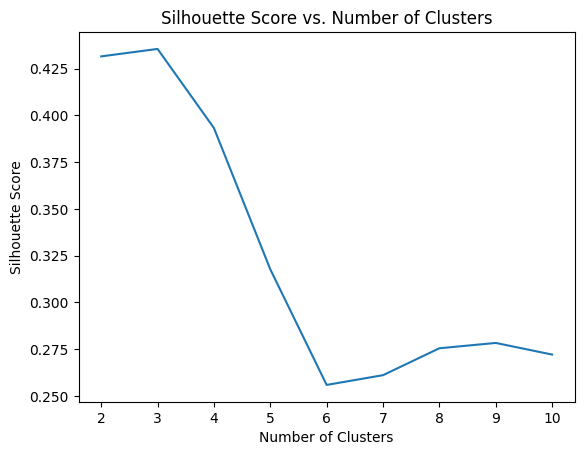

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

X = df_pca
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Dapat dilihat bahwa jumlah cluster terbaik adalah 3

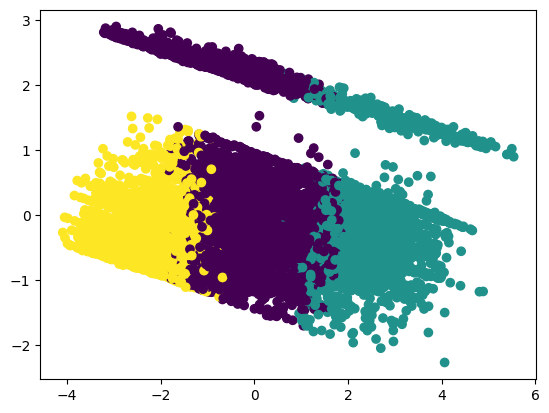

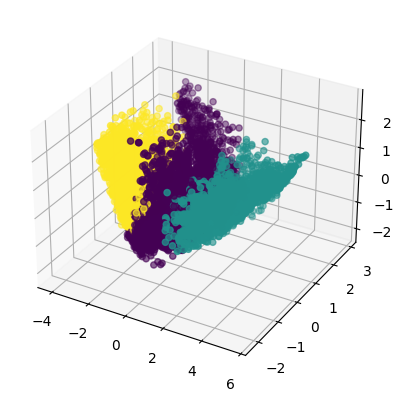

In [46]:
# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(scaled_df)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()



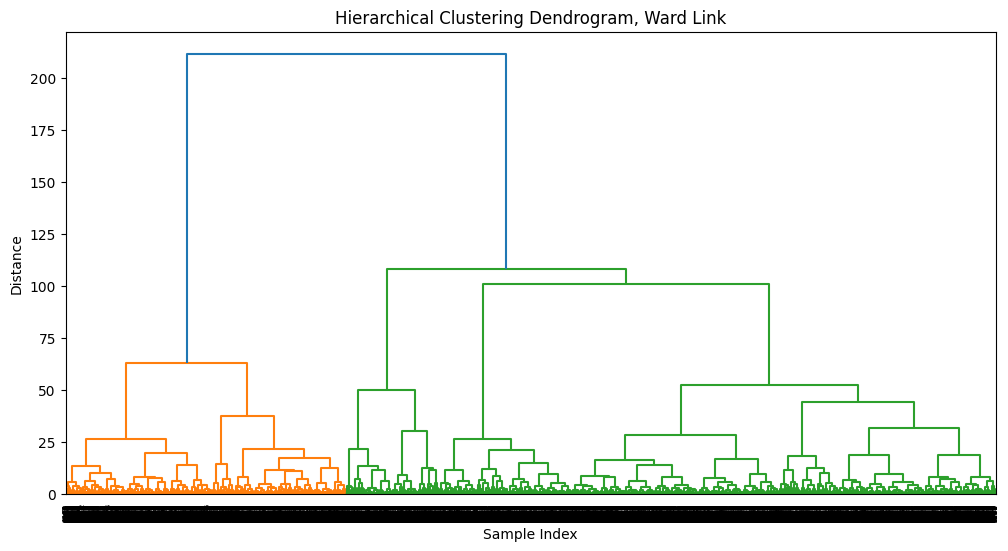

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Ward Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


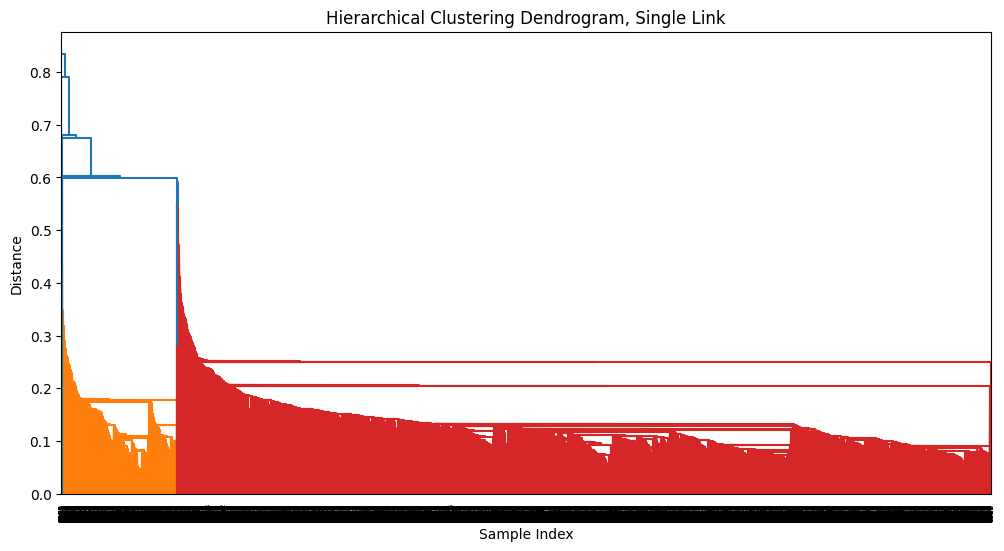

In [51]:
Z = linkage(X, method='single')  

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Single Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


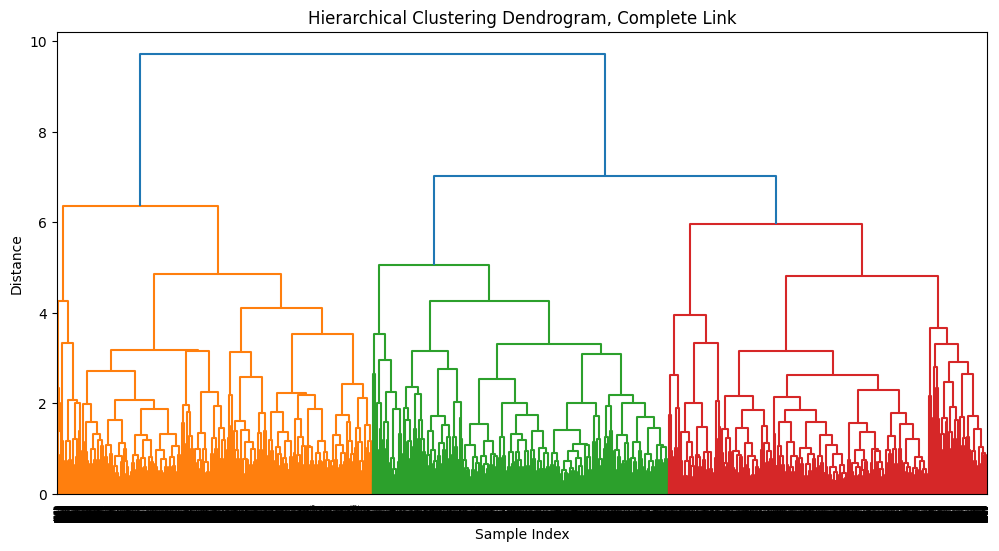

In [48]:
Z = linkage(X, method='complete')  

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Complete Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


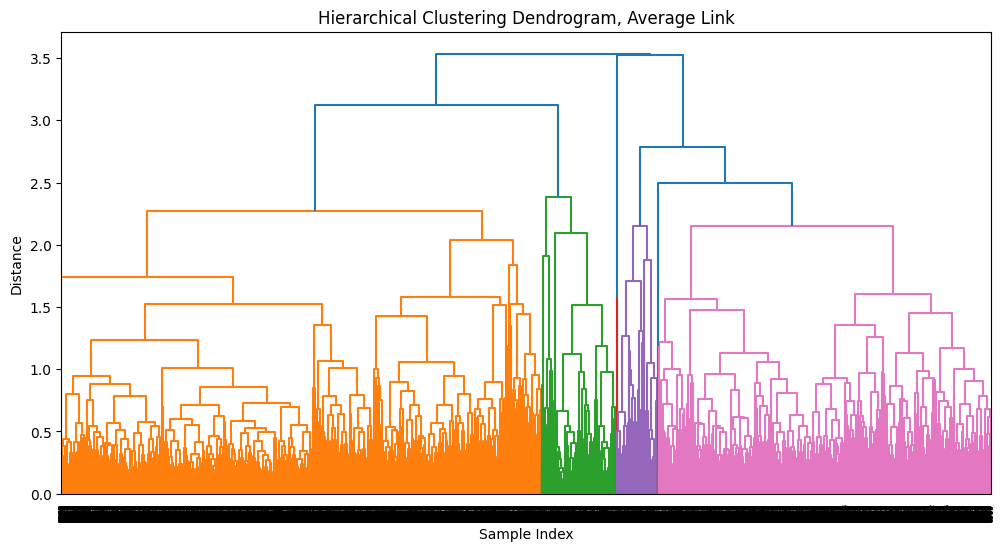

In [52]:
Z = linkage(X, method='average')  

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Average Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Dapat disimpulkan bahwa metode linkage yang terbaik adalah dengan Complete Link